In [3]:
# %%
import os
import glob
from nilearn import image
from nilearn import plotting
import numpy as np
import pandas as pd

# example of a subjectwise RDM

In [2]:
# %%
import os
import glob
from nilearn import image
from nilearn import plotting
import numpy as np
import pandas as pd

# for pain, high vs. low cue 
# correlation of average maps between cue map and stimulus map
# per sub/ses/run
# average high
singletrial_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial/'
sub = 'sub-0061'
ses = 'ses-01'
run = 'run-06'
runtype = 'pain'
event = 'stimulus'
stim_H_cue_H = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-high_stimintensity-high.nii.gz')))
stim_M_cue_H = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-high_stimintensity-med.nii.gz')))
stim_L_cue_H = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-high_stimintensity-low.nii.gz')))
stim_H_cue_L = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-low_stimintensity-high.nii.gz')))
stim_M_cue_L = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-low_stimintensity-med.nii.gz')))
stim_L_cue_L = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-low_stimintensity-low.nii.gz')))

# %% Neural RDM

stim_flist = []
[stim_flist.extend(l) for l in (stim_H_cue_H, stim_M_cue_H, stim_L_cue_H, stim_H_cue_L, stim_M_cue_L, stim_L_cue_L)]
stim_H_cue_H_mean = image.mean_img(image.concat_imgs(stim_H_cue_H)).get_fdata().ravel()
stim_M_cue_H_mean = image.mean_img(image.concat_imgs(stim_M_cue_H)).get_fdata().ravel()
stim_L_cue_H_mean = image.mean_img(image.concat_imgs(stim_L_cue_H)).get_fdata().ravel()
stim_H_cue_L_mean = image.mean_img(image.concat_imgs(stim_H_cue_L)).get_fdata().ravel()
stim_M_cue_L_mean = image.mean_img(image.concat_imgs(stim_M_cue_L)).get_fdata().ravel()
stim_L_cue_L_mean = image.mean_img(image.concat_imgs(stim_L_cue_L)).get_fdata().ravel()

runwise_array = np.vstack((stim_H_cue_H_mean, stim_M_cue_H_mean, stim_L_cue_H_mean, stim_H_cue_L_mean, stim_M_cue_L_mean, stim_L_cue_L_mean))

from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
rdm_runwise = pairwise_distances(runwise_array, metric='euclidean')
plt.imshow(rdm_runwise)
plt.xlabel("Trials", fontsize=15)
plt.ylabel("Trials", fontsize=15)
plt.title("euclidean-based RDM", fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('euclidean distance', fontsize=15)
plt.show()


TypeError: Cannot concatenate empty objects

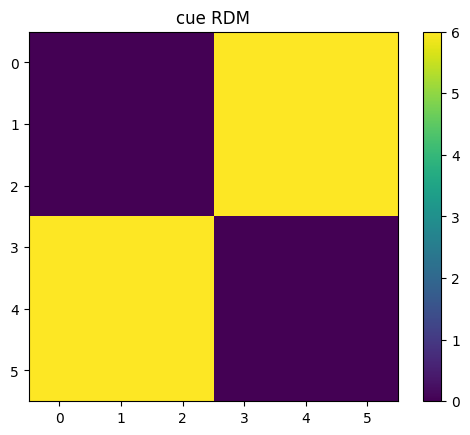

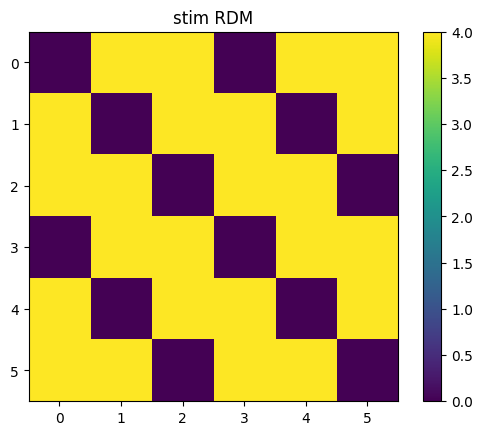

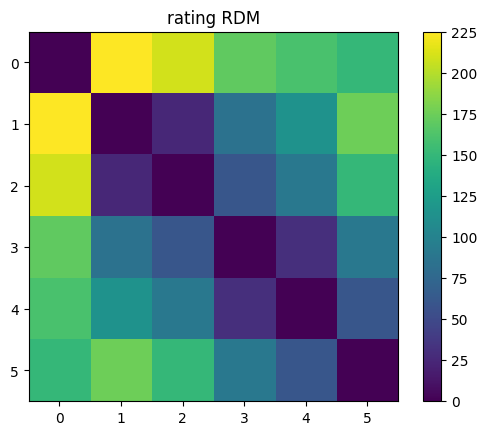

In [7]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
# %% Categorical RDM

cue_category = [[1,1,1,0,0,0],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0],
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [0,0,0,1,1,1]]
stim_category = [[1,0,0,1,0,0], 
                 [0,1,0,0,1,0],
                 [0,0,1,0,0,1],
                 [1,0,0,1,0,0], 
                 [0,1,0,0,1,0],
                 [0,0,1,0,0,1]]
# HcHs, HcMs, HcLs, LcHs, LcMs, LcLs
rating_category = [[0,15,20,30,35,45], #90
                   [15,0,-5,-10,-20,-30], #75
                   [20,5,0,-10,-15,-25], #70
                   [30,15,10,0,-5,-15], #60
                   [35,20,15,5,0,-10], #55
                   [45,30,25,15,10,0]] #45
# TODO:
surprise_category = []

rdm_cue = pairwise_distances(cue_category, metric='manhattan')
rdm_stim = pairwise_distances(stim_category, metric='manhattan')
rdm_rating = pairwise_distances(rating_category, metric='manhattan')
plt.imshow(rdm_cue)
plt.colorbar()
plt.title("cue RDM")
plt.show()

plt.imshow(rdm_stim)
plt.colorbar()
plt.title("stim RDM")
plt.show()

plt.imshow(rdm_rating)
plt.colorbar()
plt.title("rating RDM")
plt.show()


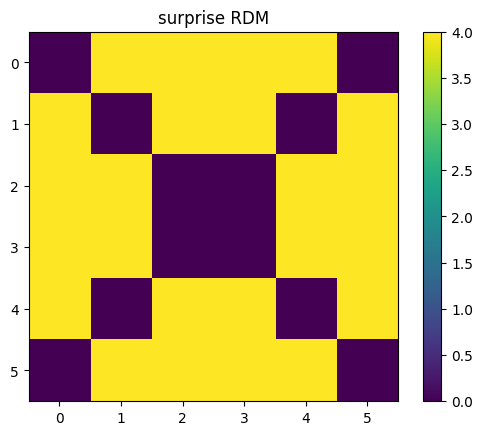

In [6]:
# TODO: barplot. 3 bars. divergence from expectation. 
# HH. LL. vs. HL. LH. 
# RDM: similarity between brain patterns between conditions
# ISC: 
# correlation/ dot product
# similarity cells cue X stim (correelation value, sd of the correlations. betweeen cue and stim. within trial)

# %% Categorical RDM
surprise_category = [[1,0,0,0,0,1],[0,1,0,0,1,0],[0,0,1,1,0,0],
                     [0,0,1,1,0,0],[0,1,0,0,1,0],[1,0,0,0,0,1]]
rdm_surprise = pairwise_distances(surprise_category, metric='manhattan')
plt.imshow(rdm_surprise)
plt.colorbar()
plt.title("surprise RDM")
plt.show()



In [ ]:

from scipy.spatial.distance import squareform
from scipy.stats import kendalltau
rdv_cue = squareform(rdm_cue)
rdv_stim = squareform(rdm_stim)
rdv_runwise = squareform(rdm_runwise.round(5))

rdm_corr, pval = kendalltau(rdv_cue, rdv_runwise)
print("Correlation between RDMs (p-value): %.3f (%.3f)" % (rdm_corr, pval))
print("Shape rdv_R:", rdv_runwise.shape)

#  reweigthing _________________
corr_cue_list =[]
corr_stim_list = []
from scipy.optimize import nnls
A = np.vstack((rdv_cue, rdv_stim))
b = rdv_runwise
sol, rnorm = nnls(A.T, b)
rdv_reweight = sol*A.T

corr_cue, pval_cue = kendalltau(sol[0]*A[0].T, rdv_runwise)
corr_stim, pval_stim = kendalltau(sol[1]*A[1].T, rdv_runwise)

corr_cue_list.extend(corr_cue)
corr_stim_list.extend(corr_stim)
# %%
# for pain, high vs. low cue 
# correlation of average maps between cue map and stimulus map

singletrial_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial/'
sub_list = next(os.walk(singletrial_dir))[1]
sub_folder = sorted([i for i in sub_list if i.startswith('sub-')])
sub = 'sub-0061'
ses = '*'
run = '*'
runtype = 'pain'
event = 'stimulus'
stim_flist = glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-{event}_trial-*.nii.gz'))
stim_flist = sorted(stim_flist)

stacked_stim = image.concat_imgs(sorted(stim_flist))
sub_mean_stim = image.mean_img(stacked_stim)

# cue
cue_flist = glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-cue_trial-*.nii.gz'))
cue_flist = sorted(cue_flist)
stacked_cue = image.concat_imgs(sorted(cue_flist))
sub_mean_cue = image.mean_img(stacked_cue)
# %%
np.corrcoef(sub_mean_cue.get_data().reshape(-1), sub_mean_stim.get_data().reshape(-1))
# %%
# voxel * trial
flist = []
stim_array = image.get_data(stacked_stim)
len_cuestack = stacked_stim.shape[-1]
R_stim = stim_array.reshape(
    np.prod(list(stacked_stim.shape[0:3])), len_cuestack)

cuearray = image.get_data(stacked_cue)
len_cuestack = stacked_cue.shape[-1]
R_cue = cuearray.reshape(
    np.prod(list(stacked_cue.shape[0:3])), len_cuestack)

R_stimcue = np.hstack((R_stim, R_cue))
flist.extend(stim_flist)
flist.extend(cue_flist)
# %%
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
rdm_stimcue = pairwise_distances(R_stimcue.T, metric='euclidean')
plt.imshow(rdm_stimcue)
plt.xlabel("Trials", fontsize=15)
plt.ylabel("Trials", fontsize=15)
plt.title("euclidean-based RDM", fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('euclidean distance', fontsize=15)
plt.show()
# %%








# %% Ver 2: stack and order
singletrial_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial/'
sub = 'sub-0061'
ses = '*'
run = '*'
runtype = 'pain'
event = 'stimulus'
stim_H_cue_H = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-high_stimintensity-high.nii.gz')))
stim_M_cue_H = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-high_stimintensity-med.nii.gz')))
stim_L_cue_H = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-high_stimintensity-low.nii.gz')))
stim_H_cue_L = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-low_stimintensity-high.nii.gz')))
stim_M_cue_L = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-low_stimintensity-med.nii.gz')))
stim_L_cue_L = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-low_stimintensity-low.nii.gz')))

stim_flist = []
[stim_flist.extend(l) for l in (stim_H_cue_H, stim_M_cue_H, stim_L_cue_H, stim_H_cue_L, stim_M_cue_L, stim_L_cue_L)]
stacked_stim = image.concat_imgs(stim_flist)
sub_mean_stim = image.mean_img(stacked_stim)

# cue
cue_H = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-cue_trial-*_cuetype-high.nii.gz')))
cue_L = sorted(glob.glob(os.path.join(
    singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-cue_trial-*_cuetype-low.nii.gz')))

cue_flist = []
[cue_flist.extend(l) for l in (cue_H, cue_L)]
stacked_cue = image.concat_imgs(cue_flist)
sub_mean_cue = image.mean_img(stacked_cue)

np.corrcoef(sub_mean_cue.get_data().reshape(-1), sub_mean_stim.get_data().reshape(-1))
# %%
# voxel * trial
flist = []
stim_array = image.get_data(stacked_stim)
len_cuestack = stacked_cue.shape[-1]
R_stim = stim_array.reshape(
    np.prod(list(stacked_cue.shape[0:3])), len_cuestack)

cuearray = image.get_data(stacked_cue)
len_cuestack = stacked_cue.shape[-1]
R_cue = cuearray.reshape(
    np.prod(list(stacked_cue.shape[0:3])), len_cuestack)

R_stimcue = np.hstack((R_stim, R_cue))
flist.extend(stim_flist)
flist.extend(cue_flist)
# %%
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
rdm_stimcue = pairwise_distances(R_stimcue.T, metric='euclidean')
plt.imshow(rdm_stimcue)
plt.xlabel("Trials", fontsize=15)
plt.ylabel("Trials", fontsize=15)
plt.title("euclidean-based RDM", fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('euclidean distance', fontsize=15)
plt.show()
# %%


















# %% Version 3
# condition wise
RDM_stim = np.array([])
track_flist = []
for cue, stim in [('high', 'high'),
                    ('high', 'med'),
                    ('high', 'low'),
                    ('low', 'high'),
                    ('low', 'med'),
                    ('low', 'low')]:
    for sub in sub_folder:
        stim_flist = []
        ses = '*'
        run = '*'
        runtype = 'pain'
        stim_flist = sorted(glob.glob(os.path.join(
            singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-{cue}_stimintensity-{stim}.nii.gz')))
        if stim_flist:
            track_flist.extend(stim_flist)
            stacked_stim = image.concat_imgs(stim_flist)
            sub_mean_stim = image.mean_img(stacked_stim)
            stim_array = image.get_data(sub_mean_stim)
            RDM_stim = np.vstack([RDM_stim, stim_array.ravel()]) if RDM_stim.size else stim_array.ravel()
        # RDM_stim = np.concatenate((RDM_stim, stim_array.ravel()), axis = 0)

from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
rdm_stimcue = pairwise_distances(RDM_stim, metric='euclidean')
plt.imshow(rdm_stimcue)
plt.xlabel("Trials", fontsize=15)
plt.ylabel("Trials", fontsize=15)
plt.title("cue-wise RDM", fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('euclidean distance', fontsize=15)
plt.show()


# %% Version 3-2
# condition wise - intensity
RDM_stim = np.array([])
track_flist = []
for cue, stim in [('high', 'high'),
                    ('low', 'high'),
                    ('high', 'med'),
                    ('low', 'med'),
                    ('high', 'low'),
                    ('low', 'low')]:
    for sub in sub_folder:
        stim_flist = []
        ses = '*'
        run = '*'
        runtype = 'pain'
        stim_flist = sorted(glob.glob(os.path.join(
            singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-{cue}_stimintensity-{stim}.nii.gz')))
        if stim_flist:
            track_flist.extend(stim_flist)
            stacked_stim = image.concat_imgs(stim_flist)
            sub_mean_stim = image.mean_img(stacked_stim)
            stim_array = image.get_data(sub_mean_stim)
            RDM_stim = np.vstack([RDM_stim, stim_array.ravel()]) if RDM_stim.size else stim_array.ravel()
        # RDM_stim = np.concatenate((RDM_stim, stim_array.ravel()), axis = 0)

from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
rdm_stimcue = pairwise_distances(RDM_stim, metric='euclidean')
plt.imshow(rdm_stimcue)
plt.xlabel("Trials", fontsize=15)
plt.ylabel("Trials", fontsize=15)
plt.title("intensity wise RDM", fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('euclidean distance', fontsize=15)
plt.show()


# %% Version 4
# subject wise
RDM_stim = np.array([])
track_flist = []

for sub in sub_folder:
    for cue, stim in [('high', 'high'),
                ('high', 'med'),
                ('high', 'low'),
                ('low', 'high'),
                ('low', 'med'),
                ('low', 'low')]:

        stim_flist = []
        ses = '*'
        run = '*'
        runtype = 'pain'
        stim_flist = sorted(glob.glob(os.path.join(
            singletrial_dir, sub, f'{sub}_{ses}_{run}_runtype-{runtype}_event-stimulus_trial-*_cuetype-{cue}_stimintensity-{stim}.nii.gz')))
        if stim_flist:
            track_flist.extend(stim_flist)
            stacked_stim = image.concat_imgs(stim_flist)
            sub_mean_stim = image.mean_img(stacked_stim)
            stim_array = image.get_data(sub_mean_stim)
            RDM_stim = np.vstack([RDM_stim, stim_array.ravel()]) if RDM_stim.size else stim_array.ravel()
        # RDM_stim = np.concatenate((RDM_stim, stim_array.ravel()), axis = 0)

from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
rdm_stimcue = pairwise_distances(RDM_stim, metric='euclidean')
plt.imshow(rdm_stimcue)
plt.xlabel("Trials", fontsize=15)
plt.ylabel("Trials", fontsize=15)
plt.title("subjectwise RDM", fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('euclidean distance', fontsize=15)
plt.show()


